# Exploratory Data Analysis

In [11]:
import os
import numpy as np
import pandas as pd

data_folder = os.path.join("..", "..", "data", "interim")
all_data = pd.read_csv(os.path.join(data_folder, 'all_train.csv'), index_col=0)
all_data.index = pd.to_datetime(all_data.index)

In [12]:
all_data.head()

,p_num,days_since_start,time,initial_resolution,bg,insulin,carbs,hr,steps,cals,activity,bg+1:00
2020-01-01 00:15:00,p01,0,00:15:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00,p01,0,00:20:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:25:00,p01,0,00:25:00,15min,9.6,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:30:00,p01,0,00:30:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:35:00,p01,0,00:35:00,15min,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
all_data.describe()

,days_since_start,bg,insulin,carbs,hr,steps,cals,bg+1:00
count,235127.000000,177435.00000,224169.000000,3340.000000,173606.000000,114273.000000,192003.000000,177024.000000
mean,44.871873,8.27683,0.194157,44.705689,78.263612,55.574554,9.366523,8.277045
std,26.211534,2.99638,0.961268,36.440903,17.797510,110.431566,7.828043,2.996398
min,0.000000,2.20000,-0.307800,1.000000,37.600000,0.000000,0.030000,2.200000
25%,22.000000,6.10000,0.050000,22.000000,64.000000,0.000000,5.600000,6.100000
50%,45.000000,7.70000,0.075000,35.000000,76.800000,9.000000,6.150000,7.700000
75%,68.000000,9.90000,0.097400,60.000000,88.900000,59.000000,9.400000,9.900000
max,91.000000,27.80000,46.311000,852.000000,185.300000,1359.000000,116.100000,27.800000


In [14]:
# load bg from p01
import  matplotlib.pyplot as plt
bg = all_data[all_data['p_num'] == 'p01']['bg']
bg


2020-01-01 00:15:00    NaN
2020-01-01 00:20:00    NaN
2020-01-01 00:25:00    9.6
2020-01-01 00:30:00    NaN
2020-01-01 00:35:00    NaN
                      ... 
2020-03-31 23:30:00    NaN
2020-03-31 23:35:00    4.8
2020-03-31 23:40:00    NaN
2020-03-31 23:45:00    NaN
2020-03-31 23:50:00    4.9
Name: bg, Length: 26204, dtype: float64

In [28]:
import seaborn as sns

def plot_patient_values(p_num, column):
    values = all_data[all_data['p_num'] == p_num][column]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(values, bins=50, edgecolor='k')
    plt.xlabel("Glucose Level (mg/dL)")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(np.log1p(values), bins=50, edgecolor='k')
    plt.xlabel("Glucose Level (mg/dL)")
    plt.ylabel("Frequency")
    plt.show()
    
    print("Mean: ", values.mean())
    
    plt.subplot(1, 3, 1)
    # boxplot
    sns.boxplot(np.log1p(values))
    plt.ylabel("Glucose Level (mg/dL)")
    plt.show()
    





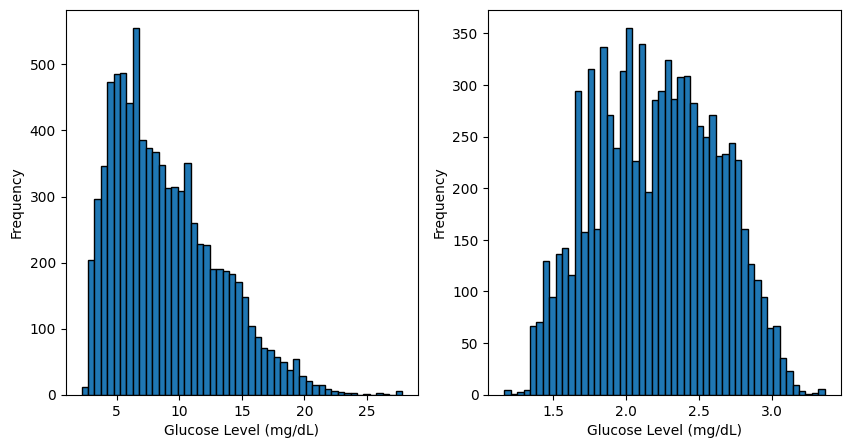

Mean:  8.9070611811859


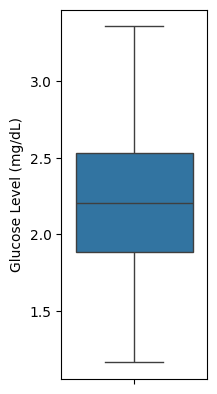

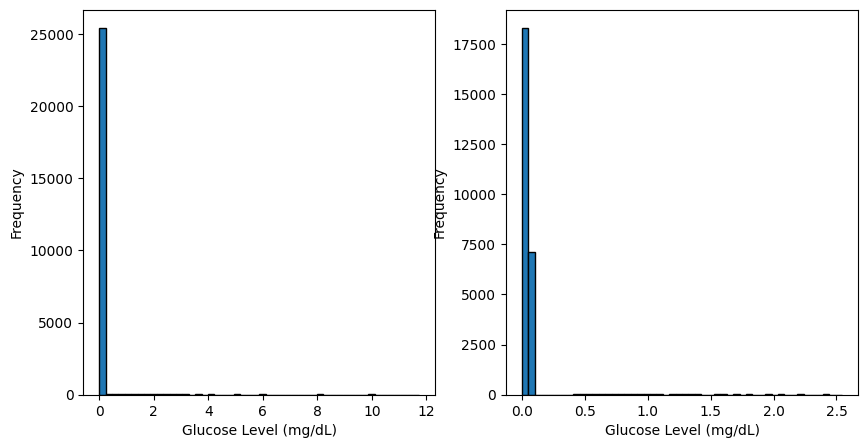

Mean:  0.13229628340916913


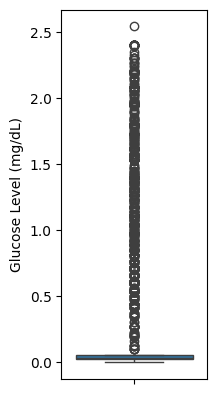

In [29]:
plot_patient_values('p01', 'bg')
plot_patient_values('p01', 'insulin')

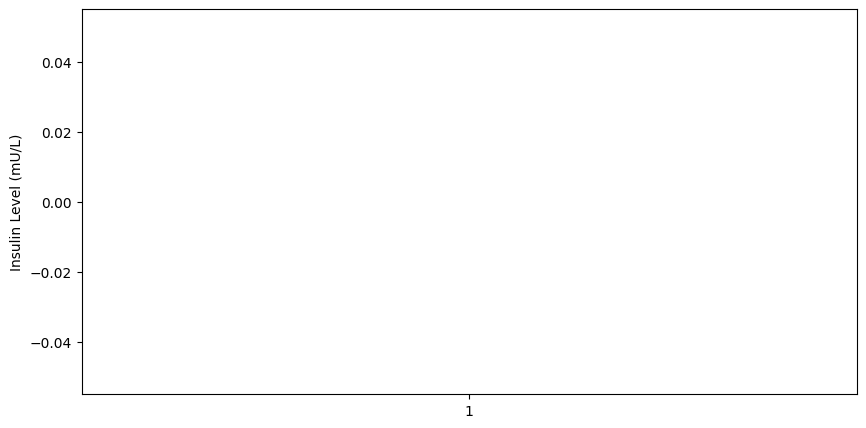

In [30]:
# boxplot insulin

p_num = 'p01'
column = 'insulin'
plt.figure(figsize=(10, 5))
plt.boxplot(all_data[all_data['p_num'] == p_num][column])
plt.ylabel("Insulin Level (mU/L)")
plt.show()
